In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image_fft(image: np.array) -> None:
    """
    Plota a imagem, calculando a transformada rápida de Fourier,
    plotando também a magnitude e fase na frequência.
    """
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    magnitude = np.log(np.abs(image_fft + 1))
    phase = np.angle(image_fft)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    axs[0].imshow(image, cmap='gray')
    axs[1].imshow(magnitude, cmap='gray')
    axs[2].imshow(phase, cmap='gray')
    axs[0].set_title('Original')
    axs[1].set_title('Magnitude')
    axs[2].set_title('Phase')
    plt.show()


def image_normalize(image: np.array) -> np.array:
    """
    Normaliza a imagem para melhorar o contraste.
    Isto é, faz o alargamento de contraste.
    """
    lmin = float(image.min())
    lmax = float(image.max())
    return np.floor((image - lmin)/(lmax-lmin) * 255)


def rotate_in_polar(image: np.array, angle: float) -> np.array:
    """
    Rotaciona a imagem de cabeça para baixo, utilizando-se as
    propriedades da transformada de Fourier com a coordenada polar.
    """
    N, M = image.shape
    
    rotated_image = np.zeros(shape=(N, M))

    for y in range(0, N):
        for x in range(0, M):
            # Compute polar coordinates increased by angle
            r = np.sqrt(x**2 + y**2)
            theta = np.arctan2(y, x) + angle
            
            # Convert back to rectangular coordinates
            x_hat = int(np.round(r*np.cos(theta)))
            y_hat = int(np.round(r*np.sin(theta)))

            rotated_image[y, x] = image[y_hat, x_hat]
    
    return rotated_image


def shift_image(image: np.array, x0: int, y0: int) -> np.array:
    """
    Aplica o deslocamento na imagem através da propriedade da
    transformada de Fourier, mutiplicando-se pela exponencial.
    """
    # Apply fft
    image_fft = np.fft.fft2(image)

    # Get image size
    N, M = image.shape

    shifted_image = np.zeros(shape=(N, M), dtype='complex')

    # Apply exponential shift property
    for v in range(N):
        for u in range(M):
            exp = np.exp(-2j * np.pi*(x0*u/M + y0*v/N))
            shifted_image[v][u] = lena_fft[v][u] * exp

    # Get inverse fourier
    return np.real(np.fft.ifft2(shifted_image))


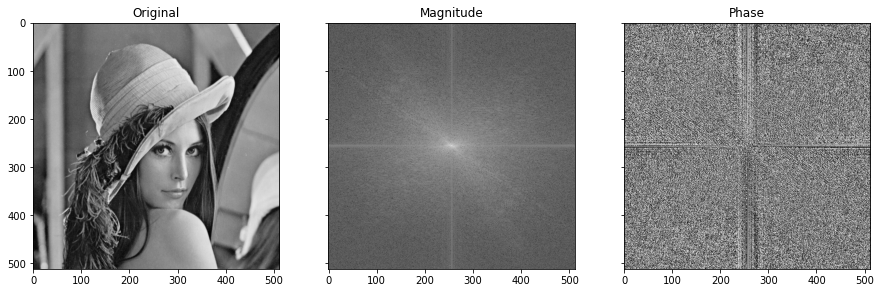

In [3]:
lena = plt.imread('../images/lena.tif').astype('uint8')
plot_image_fft(lena)

### Letra A

In [4]:
# lena fft image
lena_fft = np.fft.fft2(np.array(lena, dtype='float64'))
lena_mag = np.abs(lena_fft)
lena_pha = np.angle(lena_fft)

# Rotate
lena_mag = rotate_in_polar(lena_mag, np.pi)
lena_pha = rotate_in_polar(lena_pha, np.pi)

# Combine back
lena_combined = lena_mag * np.exp(1j*lena_pha)

# Get inverse fourier
new_lena = np.real(np.fft.ifft2(lena_combined))

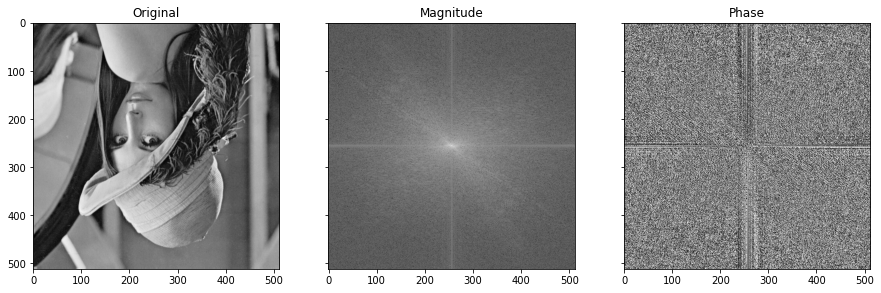

In [5]:
plot_image_fft(new_lena)

### Letra b

In [6]:
# lena fft image
lena_fft = np.fft.fft2(lena)

# Translate
N, M = lena.shape

result = np.zeros(shape=(N, M), dtype='complex')

for v in range(N):
    for u in range(M):
        result[v][u] = lena_fft[v][u] * np.exp(-2j*np.pi*(0.5 * u))

# Get inverse fourier
new_lena = np.real(np.fft.ifft2(result))

In [7]:
N, M = lena.shape
shifted_image = shift_image(lena, N//2, 0)

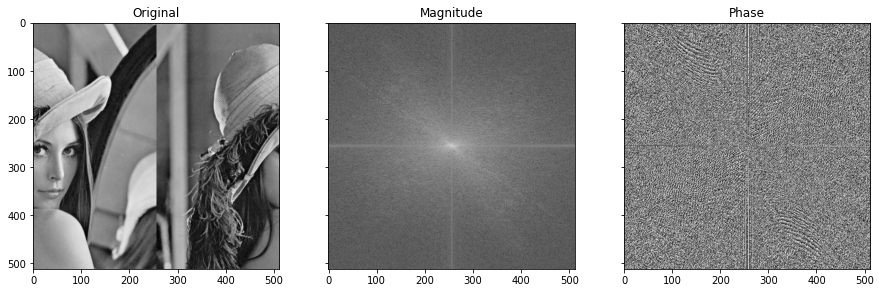

In [8]:
plot_image_fft(shifted_image)